# Research from https://aclanthology.org/S13-2045.pdf

- The SemEval-2013 paper was the 8th Recognizing Textual Entailment Challenge. The SRA corpus was created.
- The task of giving feedback on student answers requires semantic inference and therefore is related to recognizing textual entailment.
- BEETLE is a tutorial dialogue system. The BEETLE corpus is in the electricity and electronics domain.

Given a question, a known correct
‘reference answer’ and a 1- or 2-sentence ‘student
answer’, each student answer in the corpus is labelled with one of the following judgments:

• ‘Correct’, if the student answer is a complete
and correct paraphrase of the reference answer;

• ‘Partially correct incomplete’, if it is a partially correct answer containing some but not
all information from the reference answer;

• ‘Contradictory’, if the student answer explicitly
contradicts the reference answer;

• ‘Irrelevant’ if the student answer is talking
about domain content but not providing the
necessary information;

• ‘Non domain’ if the student utterance does not
include domain content, e.g., “I don’t know”,
“what the book says”, “you are stupid”.

In [1]:
from datasets import load_dataset, DatasetInfo

dataset = load_dataset("Atomi/semeval_2013_task_7_beetle_5way")

In [2]:
dataset

DatasetDict({
    train: Dataset({
        features: ['question_id', 'question', 'question_qtype', 'question_module', 'question_stype', 'reference_answer', 'reference_answer_quality', 'student_answer', 'label_5way', 'test_set'],
        num_rows: 10670
    })
    test: Dataset({
        features: ['question_id', 'question', 'question_qtype', 'question_module', 'question_stype', 'reference_answer', 'reference_answer_quality', 'student_answer', 'label_5way', 'test_set'],
        num_rows: 1489
    })
})

In [3]:
list(set(dataset["train"]["reference_answer_quality"]))

['MINIMAL', 'BEST']

In [4]:
dataset["train"].column_names

['question_id',
 'question',
 'question_qtype',
 'question_module',
 'question_stype',
 'reference_answer',
 'reference_answer_quality',
 'student_answer',
 'label_5way',
 'test_set']

In [5]:
dataset["train"][5]

{'question_id': 'HYBRID_BURNED_OUT_EXPLAIN_Q1',
 'question': 'Explain your reasoning.',
 'question_qtype': 'Q_EXPLAIN_SPECIFIC',
 'question_module': 'SwitchesBulbsParallel',
 'question_stype': 'PREDICT',
 'reference_answer': 'If bulb A burns out, B and C are no longer in a closed path with the battery',
 'reference_answer_quality': 'BEST',
 'student_answer': 'damaged bulb a creates a gap',
 'label_5way': 'partially_correct_incomplete',
 'test_set': 'training'}

In [6]:
train_split = dataset["train"]

In [7]:
print(f"features: {train_split.features}\n\n")
print(f"info: {train_split.info}")

features: {'question_id': Value(dtype='string', id=None), 'question': Value(dtype='string', id=None), 'question_qtype': Value(dtype='string', id=None), 'question_module': Value(dtype='string', id=None), 'question_stype': Value(dtype='string', id=None), 'reference_answer': Value(dtype='string', id=None), 'reference_answer_quality': Value(dtype='string', id=None), 'student_answer': Value(dtype='string', id=None), 'label_5way': Value(dtype='string', id=None), 'test_set': Value(dtype='string', id=None)}


info: DatasetInfo(description='', citation='', homepage='', license='', features={'question_id': Value(dtype='string', id=None), 'question': Value(dtype='string', id=None), 'question_qtype': Value(dtype='string', id=None), 'question_module': Value(dtype='string', id=None), 'question_stype': Value(dtype='string', id=None), 'reference_answer': Value(dtype='string', id=None), 'reference_answer_quality': Value(dtype='string', id=None), 'student_answer': Value(dtype='string', id=None), 'label_

## Unique values of "question"

In [8]:
from collections import Counter

# Extract the "question" column from the dataset
questions = [example["question"] for example in dataset["test"]]

# Count the occurrences of each unique question
question_counts = Counter(questions)

# Get the most common values and their frequencies
most_common_questions = question_counts.most_common()

# Print the most common values and their frequencies
for question, count in most_common_questions:
    print(f"Question: {question} - Count: {count}")


Question: Explain your reasoning. - Count: 252
Question: What is the relationship between the voltage reading between two terminals and their electrical states? - Count: 136
Question: Explain why you got a voltage reading of 1.5 for terminal 2 and the positive terminal. - Count: 132
Question: Why do both bulbs B and C go out when bulb A is burned out? - Count: 115
Question: Finally, consider finding a burned out light bulb in a long string of lights. One approach would be to place one lead of the multimeter on a battery terminal and then move the other lead systematically, one light bulb terminal at a time. How would you know when you have found the burned out bulb? - Count: 107
Question: Explain why you got a voltage reading of 1.5 for terminal 4 and the positive terminal. - Count: 100
Question: How does a damaged bulb compare to an open switch? - Count: 92
Question: Why did it happen? - Count: 85
Question: Explain why you got a voltage reading of 1.5 for terminal 1 and the positive t

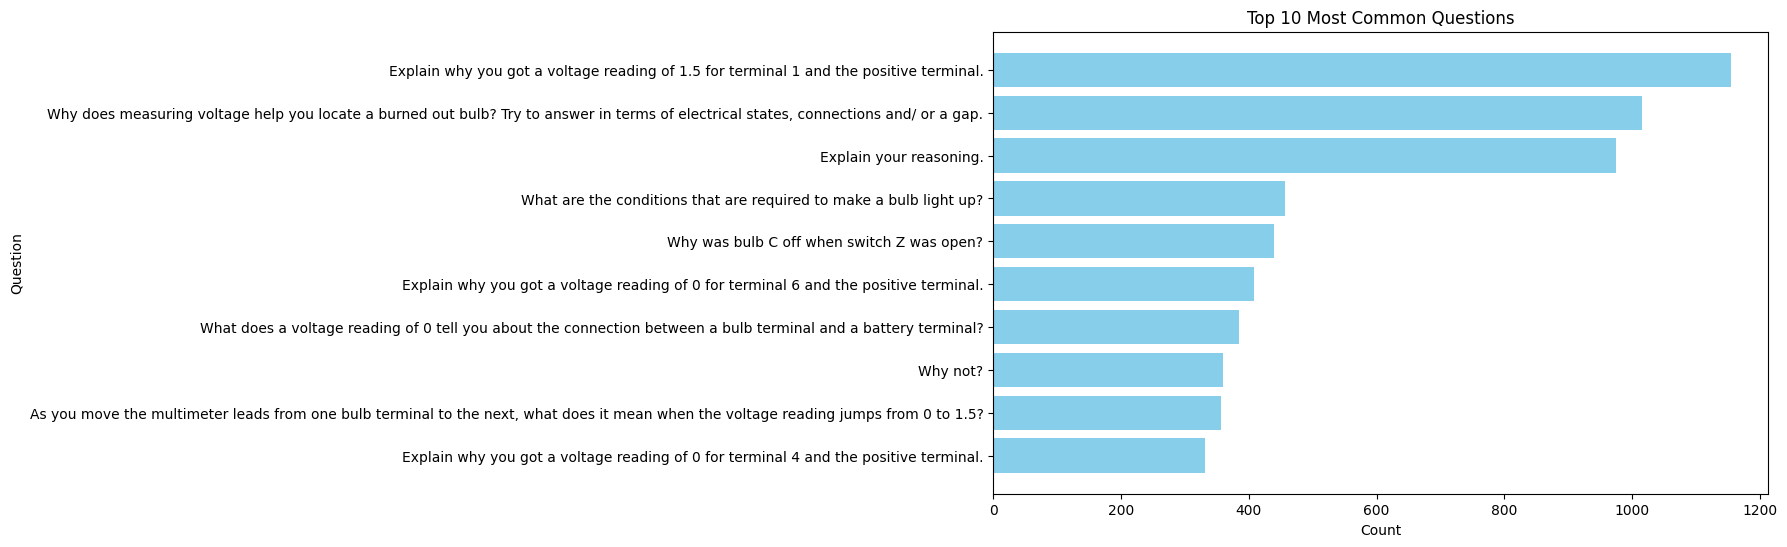

In [9]:
import matplotlib.pyplot as plt
from collections import Counter

# Extract the "question" column from the dataset
questions = [example["question"] for example in train_split]

# Count the occurrences of each unique question
question_counts = Counter(questions)

# Get the most common values and their frequencies
most_common_questions = question_counts.most_common()

# Extracting top N most common questions and their counts for visualization
N = 10  # Change N to display more or fewer questions
top_questions = [question for question, _ in most_common_questions[:N]]
top_question_counts = [count for _, count in most_common_questions[:N]]

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(top_questions, top_question_counts, color='skyblue')
plt.xlabel('Count')
plt.ylabel('Question')
plt.title('Top 10 Most Common Questions')
plt.gca().invert_yaxis()  # Invert y-axis to display the most common question on top
plt.show()


## Unique values of "question_qtype" and "question_module"

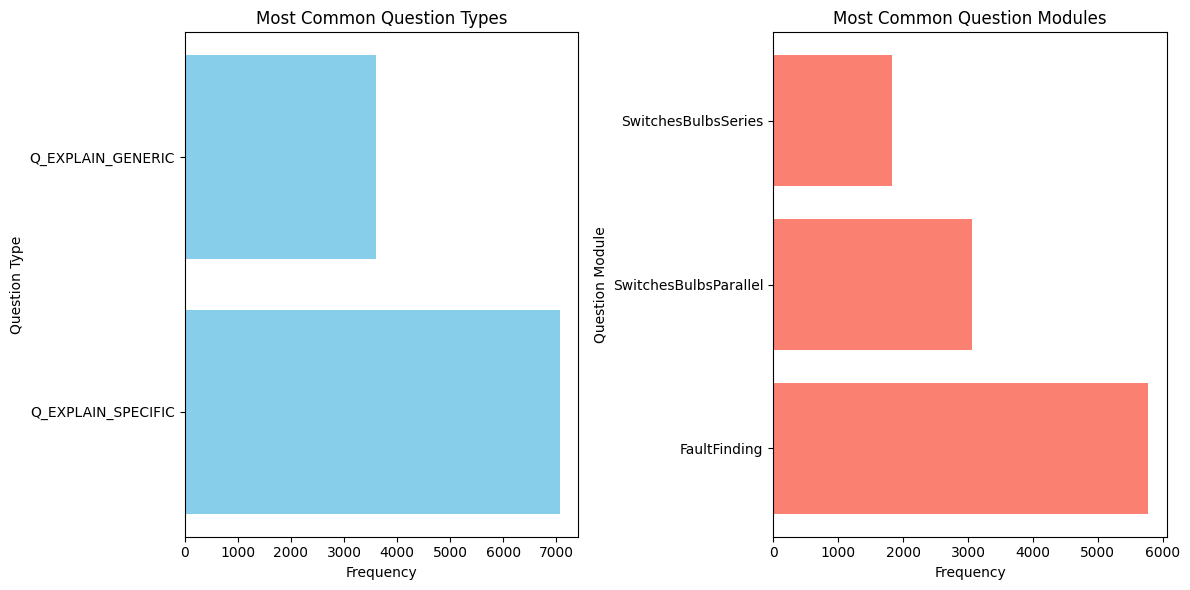

In [10]:
import matplotlib.pyplot as plt

# Extract the "question_qtype" and "question_module" columns from the dataset
question_qtypes = [example["question_qtype"] for example in train_split]
question_modules = [example["question_module"] for example in train_split]

# Count the occurrences of each unique value in "question_qtype" and "question_module"
qtype_counts = Counter(question_qtypes)
module_counts = Counter(question_modules)

# Get the most common values and their frequencies for each column
most_common_qtypes = qtype_counts.most_common()
most_common_modules = module_counts.most_common()

# Plotting
plt.figure(figsize=(12, 6))

# Plot for question_qtype
plt.subplot(1, 2, 1)
qtype_labels, qtype_counts = zip(*most_common_qtypes)
plt.barh(qtype_labels, qtype_counts, color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Question Type')
plt.title('Most Common Question Types')

# Plot for question_module
plt.subplot(1, 2, 2)
module_labels, module_counts = zip(*most_common_modules)
plt.barh(module_labels, module_counts, color='salmon')
plt.xlabel('Frequency')
plt.ylabel('Question Module')
plt.title('Most Common Question Modules')

plt.tight_layout()
plt.show()


## Unique values of "question_id"

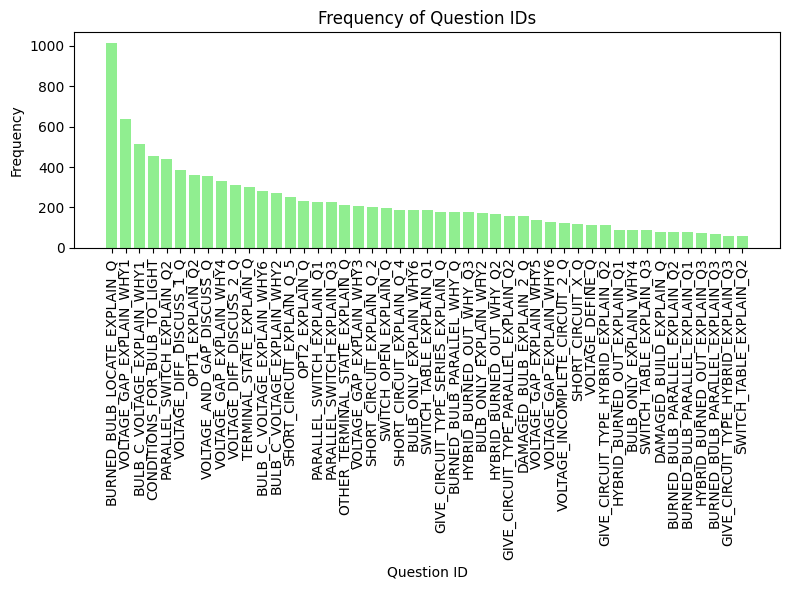

In [11]:
import matplotlib.pyplot as plt
from collections import Counter

# Extract the "question_id" column from the dataset
question_ids = [str(example["question_id"]) for example in train_split]

# Count the occurrences of each unique question_id
question_id_counts = Counter(question_ids)

# Get the most common values and their frequencies
most_common_question_ids = question_id_counts.most_common()

# Plotting
plt.figure(figsize=(8, 6))

# Plot for question_id
question_id_labels, question_id_counts = zip(*most_common_question_ids)
plt.bar(question_id_labels, question_id_counts, color='lightgreen')
plt.xlabel('Question ID')
plt.ylabel('Frequency')
plt.title('Frequency of Question IDs')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [12]:
num_unique_ids = len(set(train_split["question_id"]))
print(f"unique IDs: {num_unique_ids}")

unique IDs: 47


## Recording some "bad" questions

These questions are vague or lack sufficient context for providing meaningful answers in the context of the dataset.

In [13]:
# List of "bad" questions
bad_questions = [
    "Why not?",
    "Why?",
    "What do you think the red X means?",
    "What is voltage?",
    "Explain your reasoning.",
    "Explain why circuit 5 is a short circuit",
]

## Exploring the distribution of questions across different question modules 
To understand if certain types of questions are more prevalent in specific modules or if they are spread across multiple modules.

**Finding**: questions are unique to each question model

In [14]:
from collections import defaultdict

# Create a defaultdict to store question counts for each question module
question_module_counts = defaultdict(Counter)

# Iterate over the train_split dataset
for example in train_split:
    question_module = example["question_module"]
    question = example["question"]
    question_module_counts[question_module][question] += 1

# Display the question distribution for each question module
for question_module, question_counts in question_module_counts.items():
    print(f"Question Module: {question_module}")
    most_common_questions = question_counts.most_common()
    for question, count in most_common_questions:
        print(f"Question: {question} - Count: {count}")
    print("\n")


Question Module: SwitchesBulbsParallel
Question: Explain your reasoning. - Count: 718
Question: Why was bulb C off when switch Z was open? - Count: 440
Question: Why not? - Count: 360
Question: Describe the paths in this diagram and explain how those paths account for the results. - Count: 234
Question: Why was bulb A on when switch Y was open and switch Z was closed? - Count: 228
Question: What role does the path play in determining whether or not a switch affects a bulb? - Count: 228
Question: When switch X was closed and switch Y was open, why was bulb A on? - Count: 186
Question: Why didn^t bulbs A and C go out after bulb B burned out? - Count: 178
Question: Under what circumstances will a damaged/ burned out bulb affect another bulb? - Count: 178
Question: Why do both bulbs A and B stay on when bulb C is burned out? - Count: 168
Question: Under what circumstances will a switch affect a bulb? - Count: 88
Question: When switch X was open and switch Y was closed, why were bulbs B and

**The results from above suggest that each question is unique to each question module**

## Reference Answer Quality

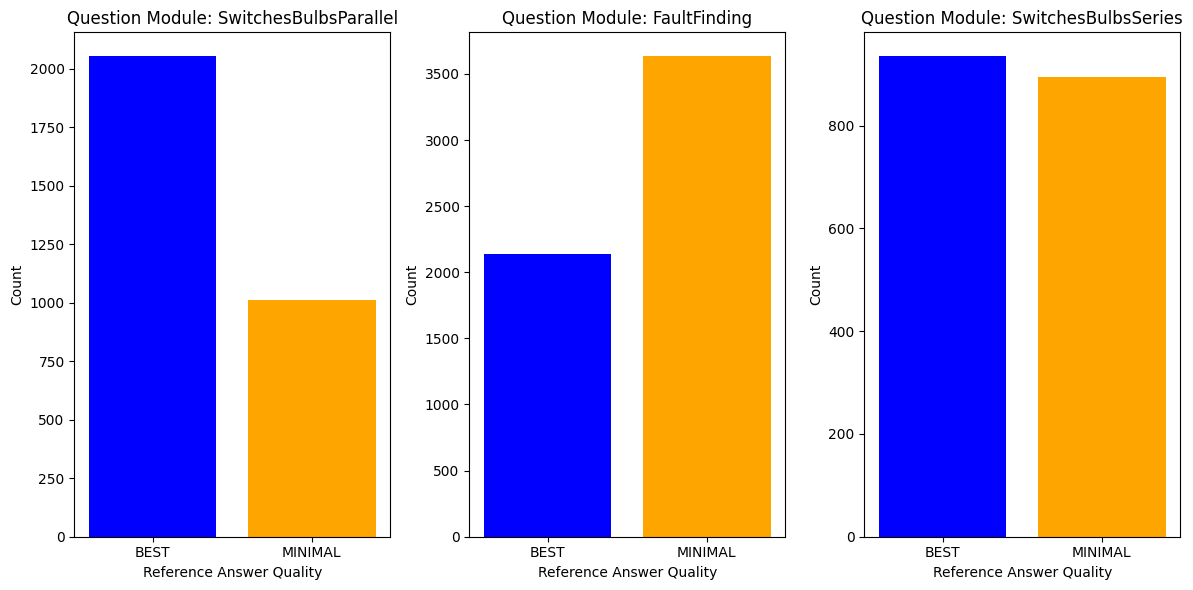

In [15]:
import matplotlib.pyplot as plt
from collections import defaultdict

# Create a defaultdict to store counts of reference answer quality for each question module
quality_counts = defaultdict(lambda: defaultdict(int))

# Iterate over the train_split dataset
for example in train_split:
    question_module = example["question_module"]
    reference_answer_quality = example["reference_answer_quality"]
    quality_counts[question_module][reference_answer_quality] += 1

# Plotting
plt.figure(figsize=(12, 6))

for i, (question_module, counts) in enumerate(quality_counts.items(), start=1):
    ax = plt.subplot(1, len(quality_counts), i)
    ax.bar(counts.keys(), counts.values(), color=['blue', 'orange'])
    ax.set_xlabel('Reference Answer Quality')
    ax.set_ylabel('Count')
    ax.set_title(f'Question Module: {question_module}')

plt.tight_layout()
plt.show()


## Distribution of Labels

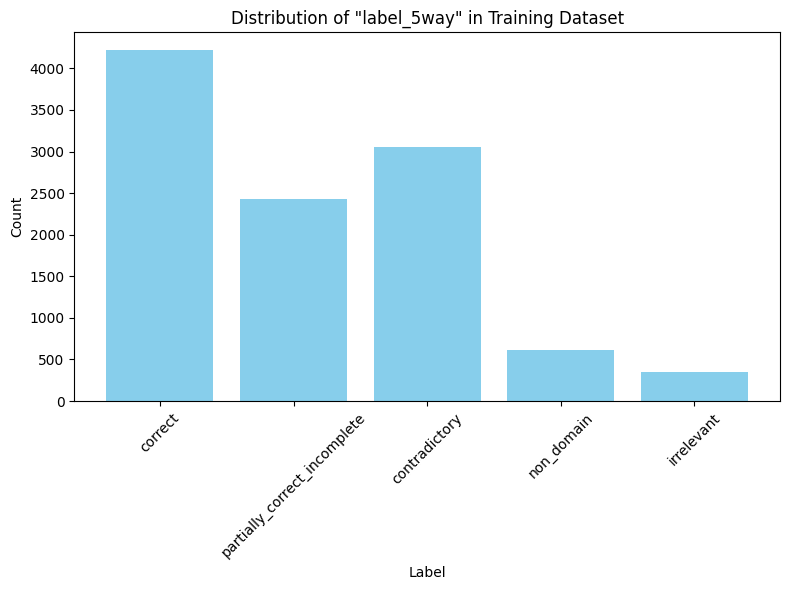

In [16]:
import matplotlib.pyplot as plt
from collections import Counter

# Extract the "label_5way" column from the training dataset
labels_5way = [example["label_5way"] for example in train_split]

# Count the occurrences of each unique label
label_counts = Counter(labels_5way)

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(label_counts.keys(), label_counts.values(), color='skyblue')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of "label_5way" in Training Dataset')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


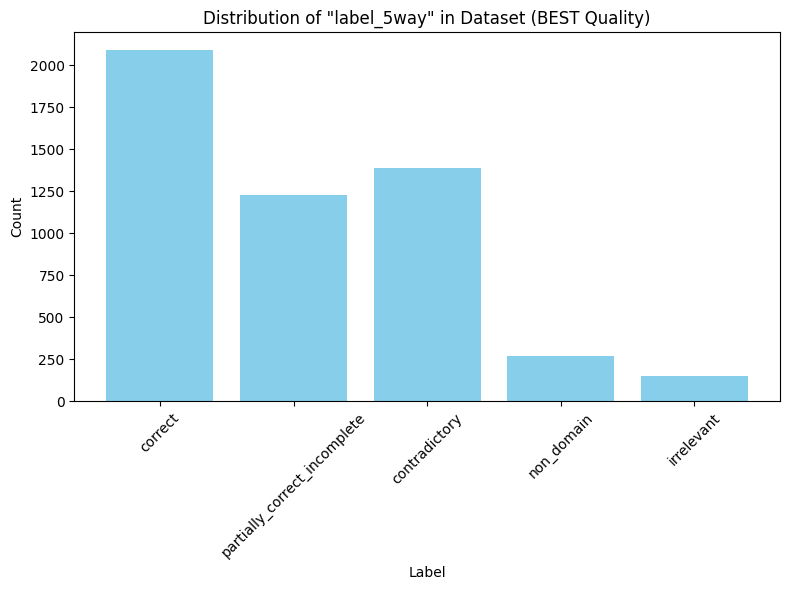

In [17]:
import matplotlib.pyplot as plt
from collections import Counter

# Filter the dataset to include only examples with reference answer quality "BEST"
best_quality_dataset = [example for example in train_split if example["reference_answer_quality"] == "BEST"]

# Extract the "label_5way" column from the filtered dataset
labels_5way_best = [example["label_5way"] for example in best_quality_dataset]

# Count the occurrences of each unique label
label_counts_best = Counter(labels_5way_best)

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(label_counts_best.keys(), label_counts_best.values(), color='skyblue')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of "label_5way" in Dataset (BEST Quality)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


# Key Takeaways from EDA

- We shall use the BEST quality answers as there are enough examples. The label distribution with BEST answers is the same as MINIMAL.
- We are not going to filter out the bad questions, at least to start with. The model should mostly predict by comparing the answer to the reference answer.
- The label distribution isn't ideal. "irrelevant" and "non_domain" labels are sparse. Future work could be to improve this.
- Questions are unique to each question model